In [11]:
%matplotlib inline
from plots import *
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
#import seaborn as sns
#plt.style.use("bmh")

redish = '#EE7733'
blueish = '#0077BB'
greenish = '#009988'

fs = 16
grid_alpha=0.35
plt.rc('legend', frameon=False)
plt.rc('figure', dpi=120)
plt.rc('savefig', dpi=300)
plt.rc('font', size=fs)
plt.tight_layout()

column_width = 3.3*3
page_width = 20

<Figure size 720x480 with 0 Axes>

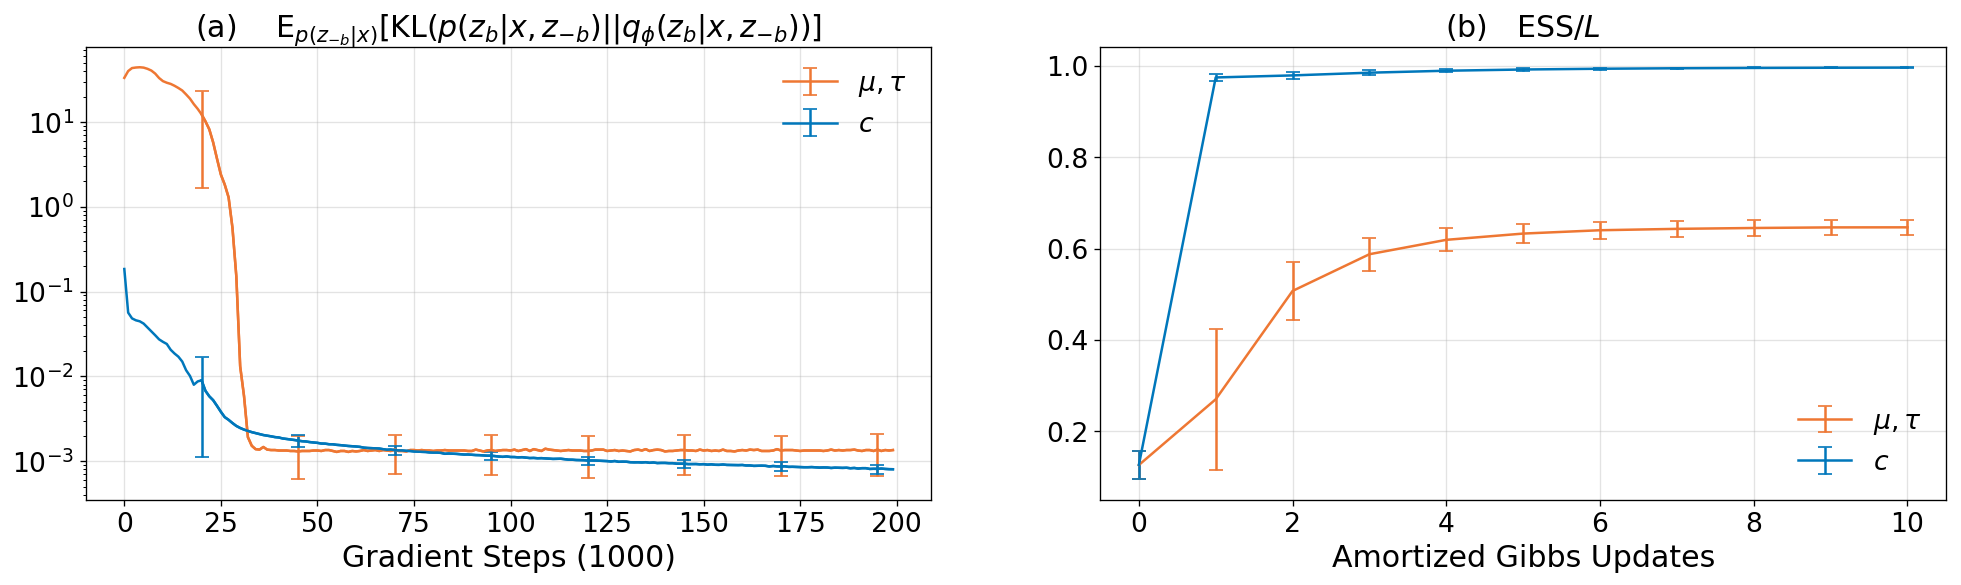

In [12]:
fig = plt.figure(figsize=(page_width, 0.25 * page_width))

kl_eta = []
kl_z = []
for i in range(10):
    PATH = 'neurips/ag-10runs/log/log-ag-10runs-%dround.txt' % i
    df = pd.read_csv(PATH, sep=',  ', engine='python')
    kl_eta.append((df["KL_eta_in"].values) / 6)
    kl_z.append((df["KL_z_in"].values) / 60)
kl_eta_mean = np.vstack(kl_eta).mean(0)
kl_eta_std = np.vstack(kl_eta).std(0)
kl_z_mean = np.vstack(kl_z).mean(0)
kl_z_std = np.vstack(kl_z).std(0)
xrange = np.arange(kl_eta_mean.shape[0])

ax1 = fig.add_subplot(1, 2, 1)
# ax1.set_title('Detailed Balance', fontsize=fs)
ax1.set_title("(a) " + r'$\quad\mathrm{E}_{p(z_{-b} | x)}[\mathrm{KL}(p(z_b|x, z_{-b}) || q_{\phi}(z_b|x, z_{-b}))]$', fontsize=18)
ax1.set_xlabel('Gradient Steps (1000)', fontsize=18)
ax1.grid(alpha=grid_alpha)
ax1.set_yscale("log")
n_stds = 1.

os_eta = 20
ax1.plot(xrange, kl_eta_mean, redish)
ax1.errorbar(xrange[os_eta:], kl_eta_mean[os_eta:], yerr=kl_eta_std[os_eta:], capsize=4, color=redish, label=r'$\mu, \tau$', errorevery=25)
#ax1.fill_between(xrange, kl_eta_mean - n_stds * kl_eta_std, kl_eta_mean + n_stds * kl_eta_std ,color=redish, alpha=0.2)
#for i in range(10): ax1.plot(xrange, kl_eta[i], redish, alpha=0.1)
#ax1.plot(xrange, kl_eta_std, redish, label=r'', ls='dashed') 
    
ax1.plot(xrange, kl_z_mean, blueish)
ax1.errorbar(xrange[os_eta:], kl_z_mean[os_eta:], yerr=kl_z_std[os_eta:], capsize=4, color=blueish, label=r'$c$', errorevery=25)
#ax1.fill_between(xrange, kl_z_mean - n_stds * kl_z_std, kl_z_mean + n_stds * kl_z_std, color=blueish, alpha=0.2)
#for i in range(10): ax1.plot(xrange, kl_z[i], blueish, alpha=0.1)
#ax1.plot(xrange, kl_z_std, blueish, label=r'', ls='dashed')
ax1.legend(fontsize=fs)

## DB_eta is kl divergence for 3 global variables
## DB_z is kl divergence for 60 local variables
## ess is ESS 
## put two KL plots in one figure, using label to denote each one
## divide DB_eta / 3, divide DB_z / 60
## each array is 10 * 11, we filter out the first column, i.e. array[:, 1:]
# each row is an individual experiemnt, 
DB_eta = np.load('neurips/ag-10runs/test/test-10runs-DB-eta.npy')
DB_z = np.load('neurips/ag-10runs/test/test-10runs-DB-z.npy')
ess_eta = np.load('neurips/ag-10runs/test/test-10runs-ess_eta.npy')
ess_z = np.load('neurips/ag-10runs/test/test-10runs-ess_z.npy')
NUM_SAMPLES = 10

# DB_eta_mean = np.mean(DB_eta / 6, 0)[1:]
# DB_z_mean = np.mean(DB_z / 6, 0)[1:]
# DB_eta_std = np.std(DB_eta / 6, 0)[1:]
# DB_z_std = np.std(DB_z / 6, 0)[1:]
# DB_xrange = np.arange(10) + 1

ess_eta_avg = np.mean(ess_eta / NUM_SAMPLES, 0) 
ess_eta_std = np.std(ess_eta / NUM_SAMPLES, 0)
ess_eta_xrange = np.arange(11)
ess_z_avg = np.mean(ess_z / NUM_SAMPLES, 0) 
ess_z_std = np.std(ess_z / NUM_SAMPLES, 0)
ess_z_xrange = np.arange(11)
# ax2 = fig.add_subplot(1, 3, 2)
# ax2.grid(alpha=grid_alpha)
# ax2.errorbar(DB_xrange, DB_z_mean, yerr=DB_z_std, capsize=4, color=redish, label=r'$\mu, \tau$')
# ax2.errorbar(DB_xrange, DB_eta_mean, yerr=DB_eta_std, capsize=4, color=blueish, label=r'$c$')
# ax2.set_xlabel('APG Updates', fontsize=fs)
# ax2.set_ylabel("Detailed Balance", fontsize=fs)
# # ax2.set_title('Detailed Balance', fontsize=fs)
# ax2.legend(fontsize=fs)
# ax2.set_yscale("log")

ax3 = fig.add_subplot(1, 2, 2)
ax3.grid(alpha=grid_alpha)
ax3.set_xlabel('Amortized Gibbs Updates', fontsize=18)
ax3.set_title("(b)" + r'$\quad\mathrm{ESS} / L$', fontsize=18)
# ax3.set_title('Effective Sample Size', fontsize=fs)
ax3.errorbar(ess_eta_xrange, ess_eta_avg, yerr=ess_eta_std, capsize=4, color=redish, label=r'$\mu, \tau$')
ax3.errorbar(ess_z_xrange, ess_z_avg, yerr=ess_z_std, capsize=4, color=blueish, label=r'$c$')

ax3.legend(fontsize=fs)

In [14]:
fig.savefig('/home/hao/metric-gmm.pdf', bbox_inches='tight')